### 4. **Análisis de Cohortes**
**Resumen:** El análisis de cohortes permite agrupar datos según características específicas y observar cómo se comportan a lo largo del tiempo. Se centra en cohortes de precios y ventas para entender las dinámicas del mercado.

1. **Cohortes Basadas en Precios Promedios Trimestrales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `Date`.
   - **Esperado:** Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
     - Agrupa los datos por trimestre usando `pd.Grouper` con `freq='Q'`.
     - Calcula el promedio de `AveragePrice` y suma `Total Volume` para cada cohorte.
     - Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.

2. **Cohortes por Región y Fecha:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice`, `Total Volume`, `region` y `Date`.
   - **Esperado:** Analiza cómo varían las cohortes de diferentes regiones.
     - Agrupa los datos por `region` y `Date` usando `groupby()`.
     - Calcula el promedio de precios y volumen para cada cohorte.
     - Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.

3. **Análisis de Cohortes en Función del Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.

4. **Cohortes de Clientes Basadas en Ventas:**
   - **Uso de Datos:** Usa las columnas `Total Volume`, `Date` y `region`.
   - **Esperado:** Analiza el comportamiento de las cohortes según el volumen de ventas.
     - Clasifica los clientes según su volumen de compras.
     - Visualiza las cohortes en gráficos de líneas o barras que muestren el comportamiento de compra a lo largo del tiempo.

5. **Evaluación de Retención de Ventas por Cohorte:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Estudia cómo se retienen las ventas en cohortes a lo largo de un año.
     - Agrupa los datos por mes y cohortes.
     - Calcula la retención de ventas y visualiza los resultados en un gráfico de líneas que muestre las tasas de retención.



In [10]:
# Cargar librerias
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
sys.path.append('../../../aguacate-aljoan/')  # Adjust to the path where utils is located
from utils.data import obtener_nuevo_avocado, imputar_fechas

df_orig = imputar_fechas()

#df_orig = pd.read_csv("avocado_with_region_types.csv")

# guardamos el original y trabajamos con una copia
df = df_orig.copy()
# Convierte Date a tipo datetime usando pd.to_datetime().
# Convierte la columna de fecha a un formato adecuado.

df['Date'] = pd.to_datetime(df['Date'])

# Filtrar los datos para 'GreaterRegion' en la columna 'region_type'
df_reduced = df.loc[df['region_type'] == 'GreaterRegion'].copy()
df_cities = df.loc[df['region_type'] == 'City'].copy()
df_regions = df.loc[df['region_type'] == 'Region'].copy()

/tmp/ipykernel_342/2270915185.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  columns=pd.Grouper(key='Date', freq='M'),  # Agrupar por mes en las columnas


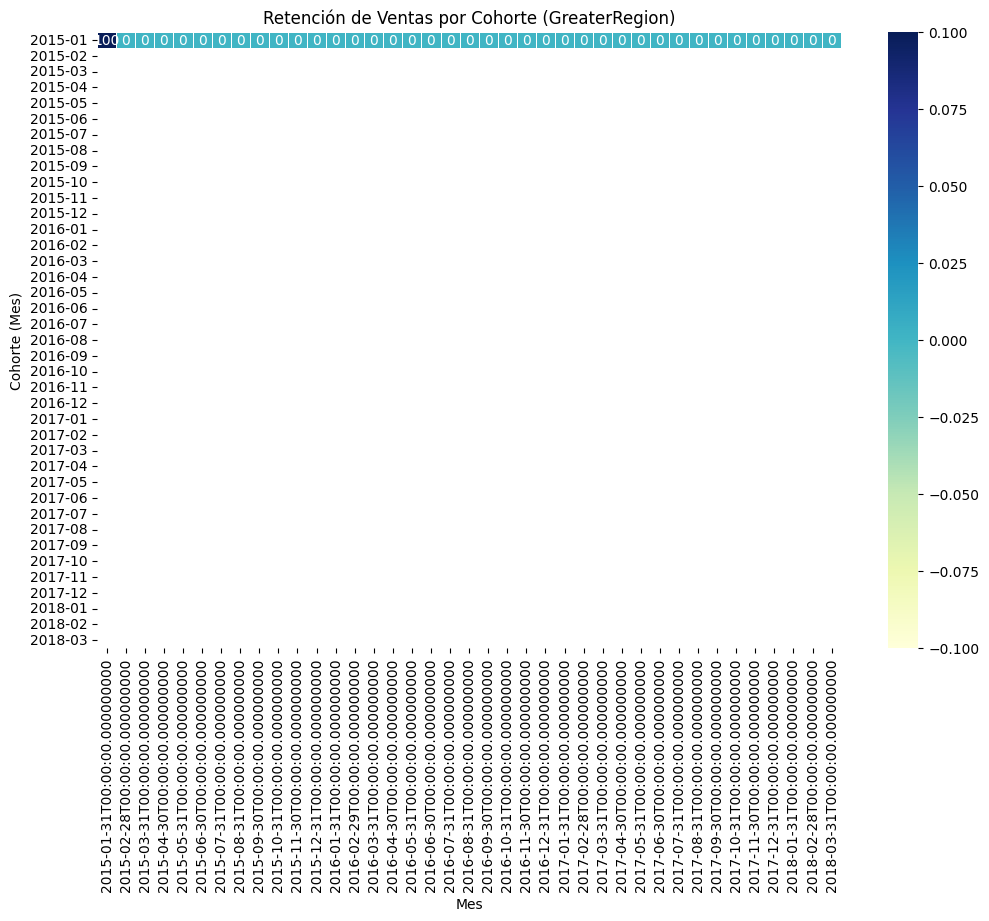

/tmp/ipykernel_342/2270915185.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortMonth'] = df['Date'].dt.to_period('M')
/tmp/ipykernel_342/2270915185.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  columns=pd.Grouper(key='Date', freq='M'),  # Agrupar por mes en las columnas


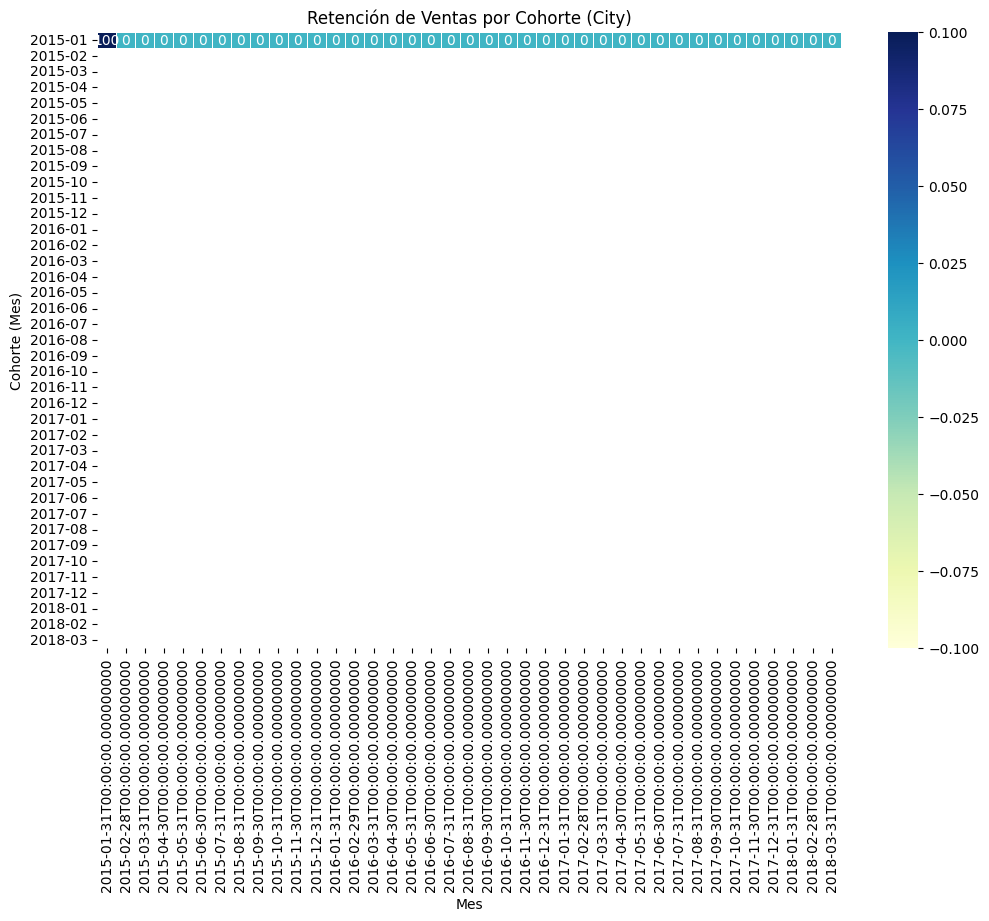

/tmp/ipykernel_342/2270915185.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortMonth'] = df['Date'].dt.to_period('M')
/tmp/ipykernel_342/2270915185.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  columns=pd.Grouper(key='Date', freq='M'),  # Agrupar por mes en las columnas


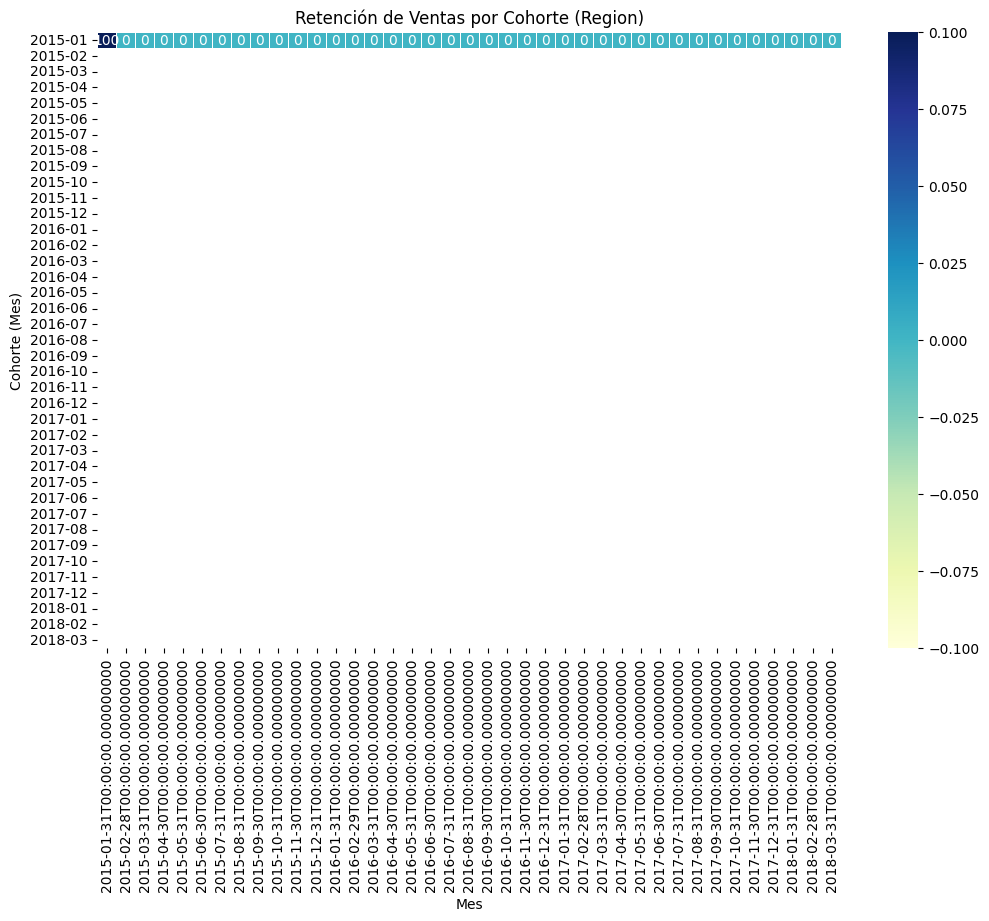

In [11]:
"""
Cohortes Basadas en Precios Promedios Trimestrales:

Uso de Datos: Usa las columnas AveragePrice, Total Volume y Date.
Esperado: Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
Agrupa los datos por trimestre usando pd.Grouper con freq='Q'.
Calcula el promedio de AveragePrice y suma Total Volume para cada cohorte.
Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes
"""
# 4.1. Cohortes Basadas en Precios Promedios Trimestrales
# Asegúrate de que las fechas están en formato datetime

df['Date'] = pd.to_datetime(df['Date'])

# Filtrar las columnas relevantes
# En avocado.csv, se utiliza 'region' en lugar de 'City' o 'Region', ajustaremos los nombres en consecuencia
df_reduced = df[['Date', 'AveragePrice', 'region', 'Total Volume']].copy()

# Separar los datos por regiones para analizar por ciudad o región
df_cities = df_reduced[df_reduced['region'].isin(['Albany', 'Atlanta', 'BaltimoreWashington'])]  # Cambia estos valores según las regiones que quieras analizar
df_regions = df_reduced[df_reduced['region'].isin(['California', 'Southeast', 'West'])]

dfs = [df_reduced, df_cities, df_regions]
labels = ['GreaterRegion', 'City', 'Region']

# Loop para calcular y visualizar las cohortes
for df, label in zip(dfs, labels):
    # Crear la columna CohortMonth
    df['CohortMonth'] = df['Date'].dt.to_period('M')

    # Calcular el volumen de ventas total por cohorte y mes
    cohort_sales = df.groupby(['CohortMonth', 'Date'])['Total Volume'].sum().reset_index()

    # Tabla pivot para obtener los datos de retención de la cohorte
    cohort_retention = cohort_sales.pivot_table(
        index='CohortMonth',
        columns=pd.Grouper(key='Date', freq='M'),  # Agrupar por mes en las columnas
        values='Total Volume',
        aggfunc='sum',
        fill_value=0
    )

    # Calcular tasas de retención como porcentaje del volumen inicial
    cohort_sizes = cohort_retention.iloc[:, 0]
    retention_rates = cohort_retention.divide(cohort_sizes, axis=0) * 100

    # Visualizar las tasas de retención
    plt.figure(figsize=(12, 8))
    plt.title(f'Retención de Ventas por Cohorte ({label})')
    sns.heatmap(retention_rates, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5, cbar=True)
    plt.xlabel('Mes')
    plt.ylabel('Cohorte (Mes)')
    plt.show()

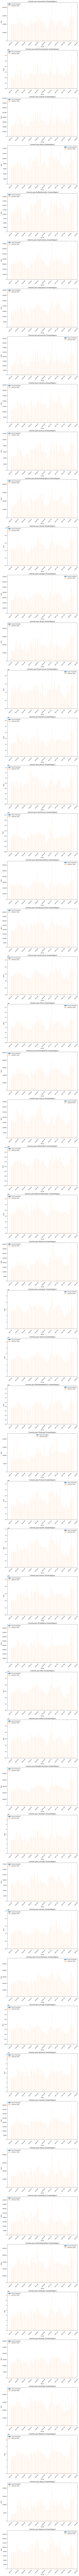

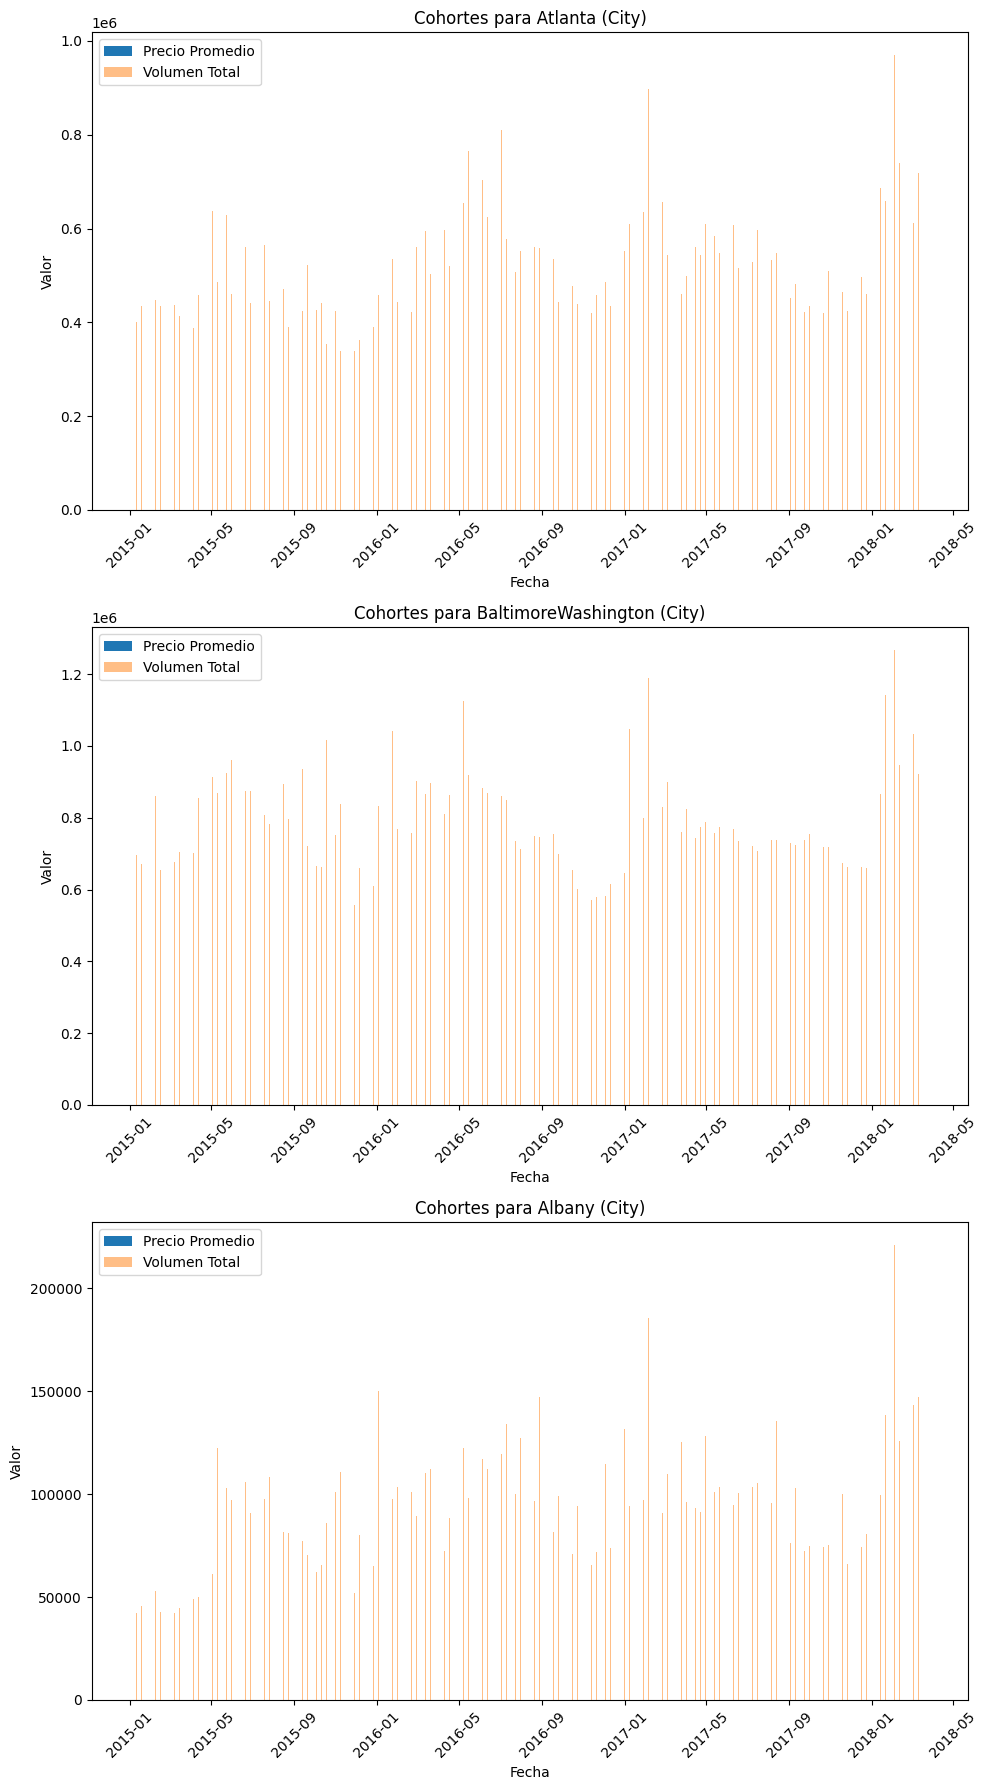

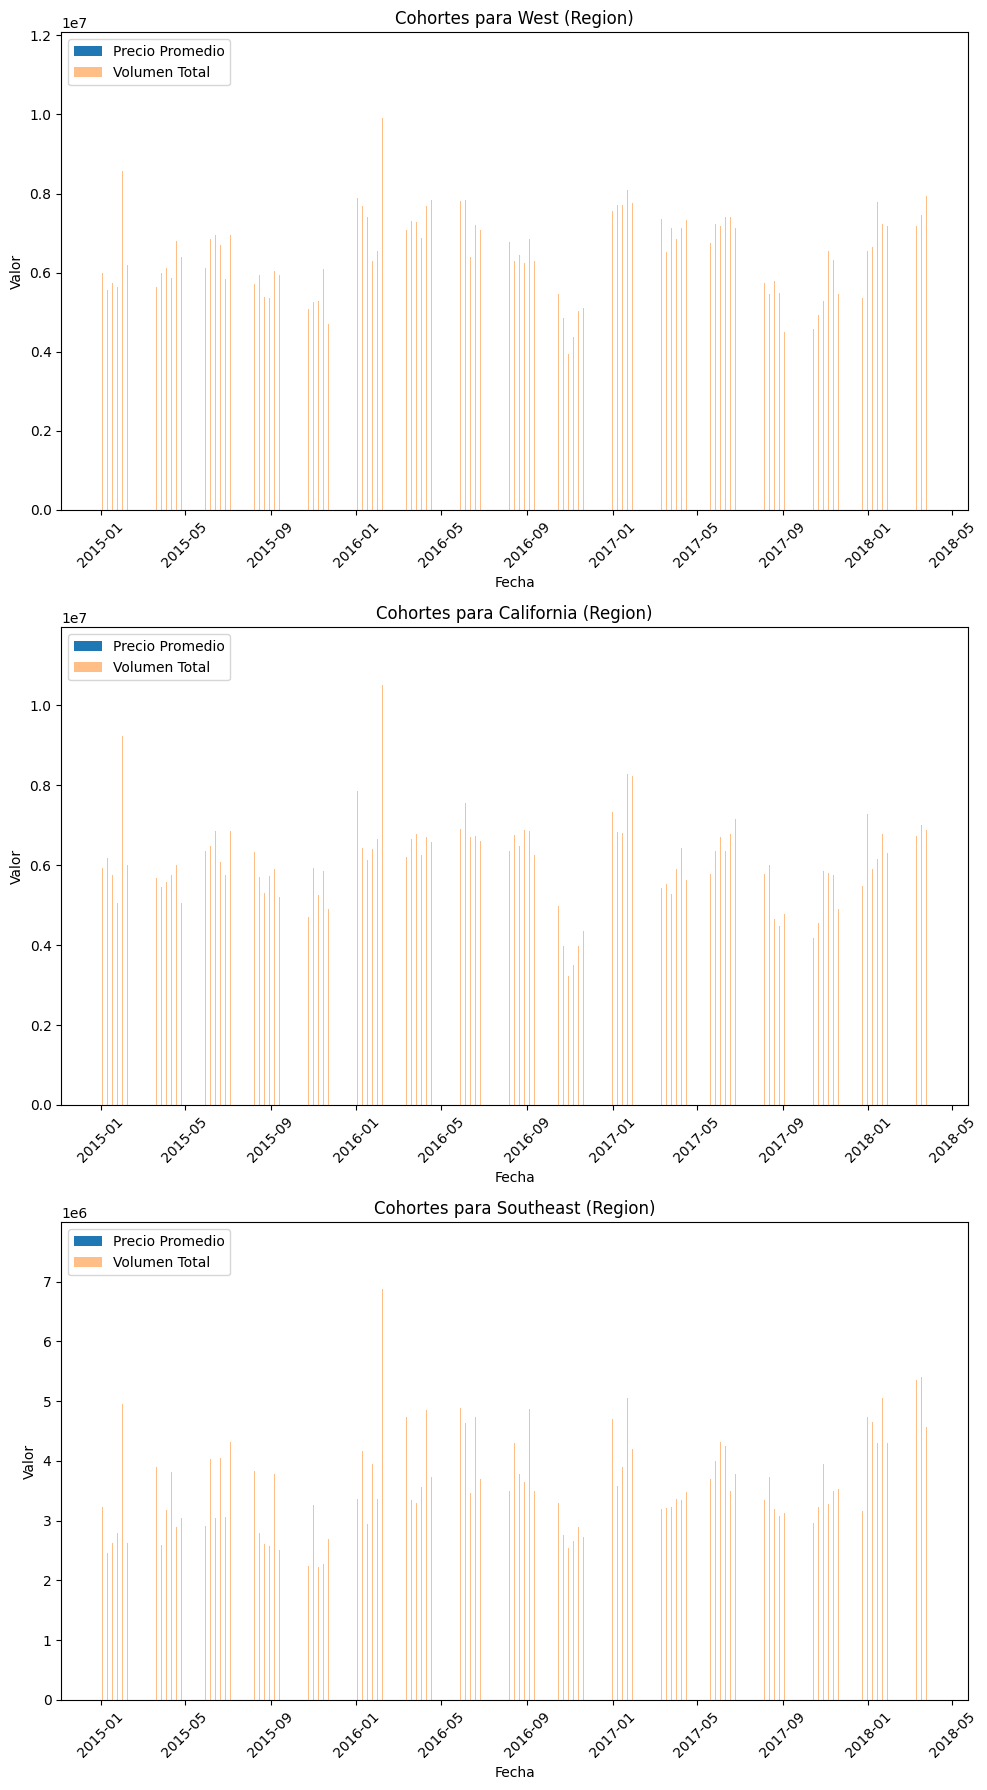

In [12]:
"""
4.2. **Cohortes por Región y Fecha:**
   - **Uso de Datos:** Utiliza las columnas `AveragePrice`, `Total Volume`, `region` y `Date`.
   - **Esperado:** Analiza cómo varían las cohortes de diferentes regiones.
     - Agrupa los datos por `region` y `Date` usando `groupby()`.
     - Calcula el promedio de precios y volumen para cada cohorte.
     - Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.
"""
import matplotlib.pyplot as plt
import pandas as pd

dfs = [df_reduced, df_cities, df_regions]
labels = ['GreaterRegion', 'City', 'Region']

for df, label in zip(dfs, labels):
    # Group by region and date
    cohorts = df.groupby(['region', 'Date']).agg({'AveragePrice': 'mean', 'Total Volume': 'sum'})

    # Create bar charts for each region
    regions = df['region'].unique()
    num_regions = len(regions)
    fig, axes = plt.subplots(nrows=num_regions, ncols=1, figsize=(10, 6 * num_regions))

    for i, region in enumerate(regions):
        cohort_data = cohorts.loc[region]
        axes[i].bar(cohort_data.index, cohort_data['AveragePrice'], label='Precio Promedio')
        axes[i].bar(cohort_data.index, cohort_data['Total Volume'], label='Volumen Total', alpha=0.5)  # Add transparency

        axes[i].set_title(f'Cohortes para {region} ({label})')
        axes[i].set_xlabel('Fecha')
        axes[i].set_ylabel('Valor')
        axes[i].legend()
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    plt.tight_layout()
    plt.show()

In [13]:
"""
4.3. **Análisis de Cohortes en Función del Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.
"""
# 4.3 Análisis de Cohortes en Función del Tipo de Bolsa
import matplotlib.pyplot as plt
import pandas as pd

dfs = [df_reduced, df_cities, df_regions]
labels = ['GreaterRegion', 'City', 'Region']
bag_types = ['Small Bags', 'Large Bags', 'XLarge Bags']

for df, label in zip(dfs, labels):
    # Group by bag type and date
    cohorts = df.groupby(['Date'])[['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].sum().reset_index()

    # Plotting the cohorts
    plt.figure(figsize=(10, 6))
    for bag_type in bag_types:
        plt.plot(cohorts['Date'], cohorts[bag_type], label=bag_type)

    plt.title(f'Evolución de Cohortes por Tipo de Bolsa ({label})')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen de Ventas Total')
    plt.legend(title='Tipo de Bolsa')
    plt.grid(True)
    plt.show()


KeyError: "Columns not found: 'Small Bags', 'XLarge Bags', 'Large Bags', 'Total Bags'"

In [ ]:
"""
4.4. **Cohortes de Clientes Basadas en Ventas:**
   - **Uso de Datos:** Usa las columnas `Total Volume`, `Date` y `region`.
   - **Esperado:** Analiza el comportamiento de las cohortes según el volumen de ventas.
     - Clasifica los clientes según su volumen de compras.
     - Visualiza las cohortes en gráficos de líneas o barras que muestren el comportamiento de compra a lo largo del tiempo.
"""
# 4.4
import matplotlib.pyplot as plt
import pandas as pd

dfs = [df_reduced, df_cities, df_regions]
labels = ['GreaterRegion', 'City', 'Region']

for df, label in zip(dfs, labels):
    # Calculate total sales volume per region
    region_sales = df.groupby('region')['Total Volume'].sum().reset_index()

    # Classify regions into sales volume cohorts (e.g., high, medium, low)
    region_sales['Sales Cohort'] = pd.qcut(region_sales['Total Volume'], 3, labels=['Low', 'Medium', 'High'])

    # Merge sales cohort back into the original DataFrame
    df = pd.merge(df, region_sales[['region', 'Sales Cohort']], on='region', how='left')

    # Group by sales cohort and date to analyze purchase behavior
    cohort_behavior = df.groupby(['Sales Cohort', 'Date'], observed=False)['Total Volume'].sum().reset_index()
#    cohort_behavior = df.groupby(['Sales Cohort', 'Date'])['Total Volume'].sum().reset_index() # to be deprecated

    # Visualize cohort behavior using line plots
    plt.figure(figsize=(10, 6))
    for cohort in cohort_behavior['Sales Cohort'].unique():
        cohort_data = cohort_behavior[cohort_behavior['Sales Cohort'] == cohort]
        plt.plot(cohort_data['Date'], cohort_data['Total Volume'], label=cohort)

    plt.title(f'Comportamiento de Compra por Cohorte de Ventas ({label})')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen Total de Ventas')
    plt.legend(title='Cohorte de Ventas')
    plt.grid(True)
    plt.show()

In [ ]:
"""
4.5. **Evaluación de Retención de Ventas por Cohorte:**
   - **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Estudia cómo se retienen las ventas en cohortes a lo largo de un año.
     - Agrupa los datos por mes y cohortes.
     - Calcula la retención de ventas y visualiza los resultados en un gráfico de líneas que muestre las tasas de retención.
"""
# 4.5 Evaluación de Retención de Ventas por Cohorte

# Asegúrate de que las fechas están en formato datetime
#df['Date'] = pd.to_datetime(df['Date'])

# Filtrar las columnas relevantes
# En avocado.csv, se utiliza 'region' en lugar de 'City' o 'Region', ajustaremos los nombres en consecuencia
#df_reduced = df[['Date', 'region', 'Total Volume']].copy()

# Separar los datos por regiones para analizar por ciudad o región
#df_cities = df_reduced[df_reduced['region'].isin(['Albany', 'Atlanta', 'BaltimoreWashington'])]  # Cambia estos valores según las regiones que quieras analizar
#df_regions = df_reduced[df_reduced['region'].isin(['California', 'Southeast', 'West'])]

dfs = [df_reduced, df_cities, df_regions]
labels = ['GreaterRegion', 'City', 'Region']

# Loop para calcular y visualizar las cohortes
for df, label in zip(dfs, labels):
    # Crear la columna CohortMonth
    df['CohortMonth'] = df['Date'].dt.to_period('M')

    # Calcular el volumen de ventas total por cohorte y mes
    cohort_sales = df.groupby(['CohortMonth', 'Date'])['Total Volume'].sum().reset_index()

    # Tabla pivot para obtener los datos de retención de la cohorte
    cohort_retention = cohort_sales.pivot_table(
        index='CohortMonth',
        columns=pd.Grouper(key='Date', freq='M'),  # Agrupar por mes en las columnas
        values='Total Volume',
        aggfunc='sum',
        fill_value=0
    )

    # Calcular tasas de retención como porcentaje del volumen inicial
    cohort_sizes = cohort_retention.iloc[:, 0]
    retention_rates = cohort_retention.divide(cohort_sizes, axis=0) * 100

    # Visualizar las tasas de retención
    plt.figure(figsize=(12, 8))
    plt.title(f'Retención de Ventas por Cohorte ({label})')
    sns.heatmap(retention_rates, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5, cbar=True)
    plt.xlabel('Mes')
    plt.ylabel('Cohorte (Mes)')
    plt.show()
